In [6]:
import pandas as pd 
import numpy as np

# Load 2024 World Happiness data from Excel file
df = pd.read_excel('../data/pone.0322287.s001.xlsx', sheet_name='2024')
df

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


# 🌍 What Makes Countries Happy?
## A Data-Driven Journey to Discover the Factors Behind National Happiness

**Research Question:** What makes countries happy, and does money really buy happiness?

---

## 📊 Step 1: Understanding the Data

Let's first explore what data we have and what factors might influence happiness.

In [7]:
# Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Set style for matplotlib/seaborn plots
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Display basic information
print("Dataset Shape:", df.shape)
print("\nColumn Names:")
print(df.columns.tolist())
print("\nBasic Statistics:")
df.describe()

Dataset Shape: (156, 9)

Column Names:
['Overall rank', 'Country or region', 'Score', 'GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']

Basic Statistics:


,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


- Score: Happiness score (From Gallup World Poll surveys — the mean of citizens’ answers to the “ladder of life” question) 

- GPD/capita: Economic production per person, adjusted for purchasing power.

- Social Support: % of people who answered “Yes” to “If you were in trouble, do you have relatives or friends you can count on to help you whenever you need them, or not?"

- Healthy Life Expectancy: 

- Freedom to Make Life Choices: % of people answering “Yes” to “Are you satisfied or dissatisfied with your freedom to choose what you do with your life?”

- Generosity: Based on “Have you donated money to a charity in the past month?”

- Perception of Corrupiton: % of people answering “Yes” to “Is corruption widespread throughout the government or business?” (values reversed so higher = less corruption).

## 🗺️ Visualization 1: Global Happiness Map

Let's visualize happiness scores across the world to see geographical patterns.

In [8]:
# Interactive choropleth map
fig = px.choropleth(
    df,
    locations="Country or region",
    locationmode="country names",
    color="Score",
    hover_name="Country or region",
    hover_data={
        'Score': ':.3f',
        'GDP per capita': ':.3f',
        'Social support': ':.3f'
    },
    color_continuous_scale="RdYlGn",
    title="World Happiness Score Distribution (2024)",
    labels={'Score': 'Happiness Score'}
)
fig.update_layout(height=600)
fig.show()

/tmp/ipykernel_26603/3821991947.py:2: DeprecationWarning:

The library used by the *country names* `locationmode` option is changing in an upcoming version. Country names in existing plots may not work in the new version. To ensure consistent behavior, consider setting `locationmode` to *ISO-3*.



## 📊 Visualization 2: Top 10 Happiest vs Bottom 10 Countries

Who are the happiest and least happy countries?

/tmp/ipykernel_26603/3790950060.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipykernel_26603/3790950060.py:21: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




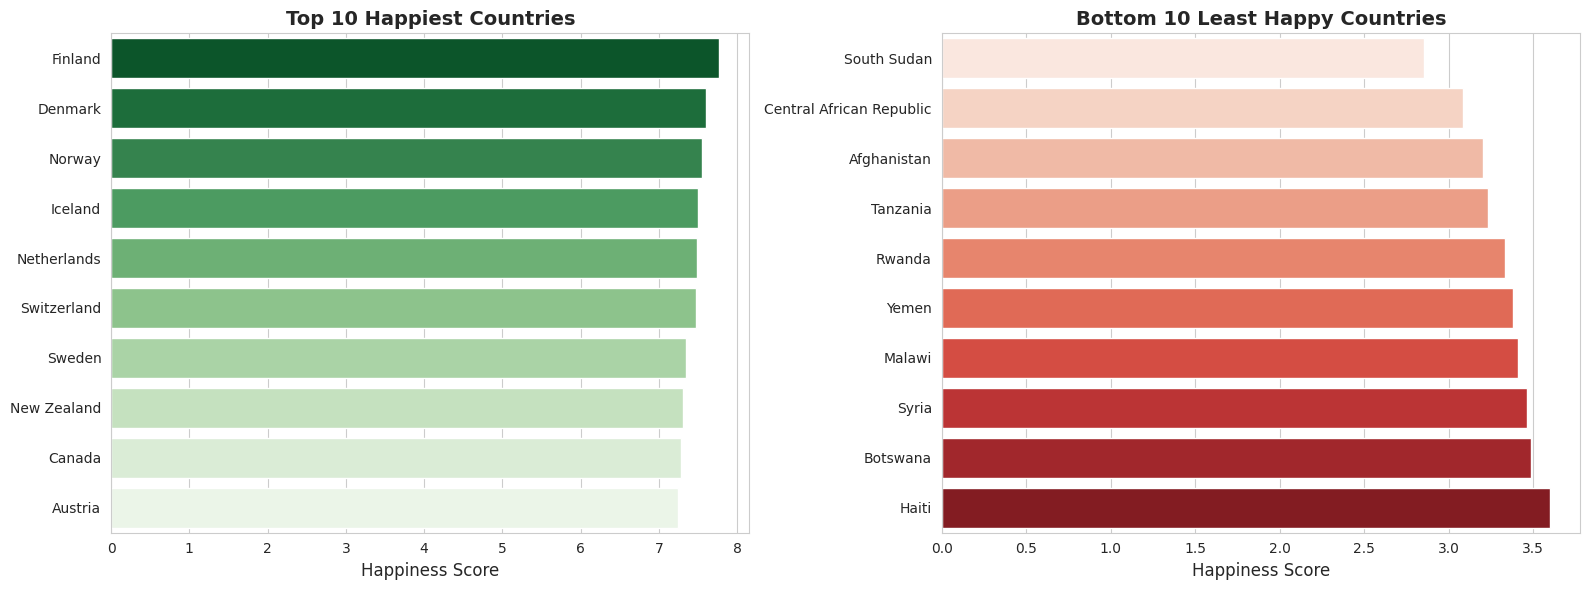

In [9]:
# Get top and bottom countries
top10 = df.nlargest(10, 'Score')
bottom10 = df.nsmallest(10, 'Score')

# Create side-by-side bar charts
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Top 10
sns.barplot(
    data=top10, 
    y='Country or region', 
    x='Score', 
    palette='Greens_r',
    ax=ax1
)
ax1.set_title('Top 10 Happiest Countries', fontsize=14, fontweight='bold')
ax1.set_xlabel('Happiness Score', fontsize=12)
ax1.set_ylabel('')

# Bottom 10
sns.barplot(
    data=bottom10, 
    y='Country or region', 
    x='Score', 
    palette='Reds',
    ax=ax2
)
ax2.set_title('Bottom 10 Least Happy Countries', fontsize=14, fontweight='bold')
ax2.set_xlabel('Happiness Score', fontsize=12)
ax2.set_ylabel('')

plt.tight_layout()
plt.show()

## 🔗 Visualization 3: Correlation Heatmap

What factors are most strongly correlated with happiness?

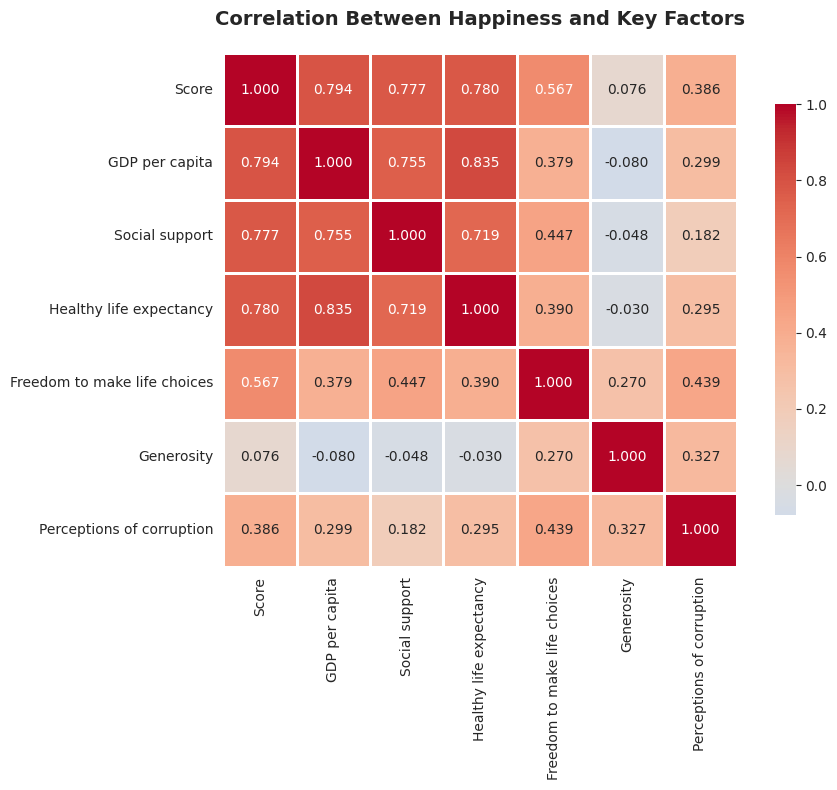


Correlation with Happiness Score (sorted):
Score                           1.000000
GDP per capita                  0.793883
Healthy life expectancy         0.779883
Social support                  0.777058
Freedom to make life choices    0.566742
Perceptions of corruption       0.385613
Generosity                      0.075824
Name: Score, dtype: float64


In [10]:
# Select numeric columns for correlation
factors = ['Score', 'GDP per capita', 'Social support', 'Healthy life expectancy', 
           'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']

# Calculate correlation matrix
correlation_matrix = df[factors].corr()

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix, 
    annot=True, 
    fmt='.3f',
    cmap='coolwarm',
    center=0,
    square=True,
    linewidths=1,
    cbar_kws={"shrink": 0.8}
)
plt.title('Correlation Between Happiness and Key Factors', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Print strongest correlations with happiness
print("\nCorrelation with Happiness Score (sorted):")
print(correlation_matrix['Score'].sort_values(ascending=False))

## 📈 Visualization 4: Factor Contributions - Stacked Bar Chart

Let's see how different factors contribute to the happiness of top countries.

In [11]:
# Get top 15 countries
top15 = df.nlargest(15, 'Score')

# Create stacked bar chart
factor_cols = ['GDP per capita', 'Social support', 'Healthy life expectancy', 
               'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']

fig = go.Figure()

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']

for i, factor in enumerate(factor_cols):
    fig.add_trace(go.Bar(
        name=factor,
        x=top15['Country or region'],
        y=top15[factor],
        marker_color=colors[i]
    ))

fig.update_layout(
    barmode='stack',
    title='What Makes the Happiest Countries Happy? (Factor Breakdown)',
    xaxis_title='Country',
    yaxis_title='Contribution to Happiness',
    height=600,
    showlegend=True,
    legend=dict(orientation="v", yanchor="top", y=1, xanchor="left", x=1.02)
)

fig.show()

## 🎯 Visualization 5: Radar Chart - Comparing Top vs Bottom Countries

Let's compare the profiles of happy vs unhappy countries across all factors.

In [12]:
# Calculate average values for top 10 and bottom 10
top10_avg = top10[factor_cols].mean()
bottom10_avg = bottom10[factor_cols].mean()

# Create radar chart
categories = ['GDP per capita', 'Social support', 'Life expectancy', 
              'Freedom', 'Generosity', 'Low corruption']

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
    r=top10_avg.values,
    theta=categories,
    fill='toself',
    name='Top 10 Happiest',
    line_color='green'
))

fig.add_trace(go.Scatterpolar(
    r=bottom10_avg.values,
    theta=categories,
    fill='toself',
    name='Bottom 10 Least Happy',
    line_color='red'
))

fig.update_layout(
    polar=dict(radialaxis=dict(visible=True, range=[0, 1.5])),
    showlegend=True,
    title='Average Profile: Happiest vs Least Happy Countries',
    height=600
)

fig.show()

## 💰 Visualization 6: Does Money Buy Happiness? - GDP vs Happiness Score

Now let's tackle our main question: Does money really buy happiness?

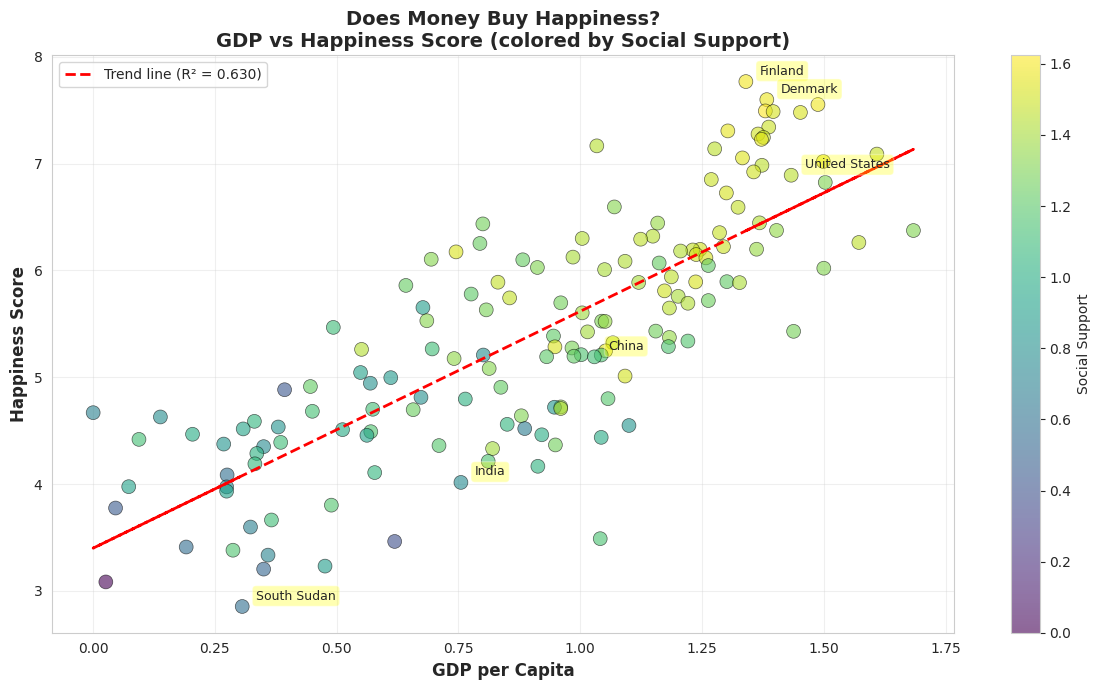


Correlation between GDP and Happiness: 0.794
R-squared: 0.630
This means GDP explains 63.0% of the variation in happiness scores.


In [13]:
# Scatter plot: GDP vs Happiness with regression line
from scipy import stats

# Calculate regression line
slope, intercept, r_value, p_value, std_err = stats.linregress(df['GDP per capita'], df['Score'])
line = slope * df['GDP per capita'] + intercept

# Create scatter plot
plt.figure(figsize=(12, 7))
scatter = plt.scatter(
    df['GDP per capita'], 
    df['Score'],
    c=df['Social support'],
    s=100,
    alpha=0.6,
    cmap='viridis',
    edgecolors='black',
    linewidth=0.5
)

# Add regression line
plt.plot(df['GDP per capita'], line, 'r--', linewidth=2, label=f'Trend line (R² = {r_value**2:.3f})')

# Add labels for some interesting countries
interesting_countries = ['Finland', 'United States', 'China', 'India', 'South Sudan', 'Denmark']
for country in interesting_countries:
    if country in df['Country or region'].values:
        country_data = df[df['Country or region'] == country].iloc[0]
        plt.annotate(
            country,
            (country_data['GDP per capita'], country_data['Score']),
            xytext=(10, 5),
            textcoords='offset points',
            fontsize=9,
            bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.3)
        )

plt.colorbar(scatter, label='Social Support')
plt.xlabel('GDP per Capita', fontsize=12, fontweight='bold')
plt.ylabel('Happiness Score', fontsize=12, fontweight='bold')
plt.title('Does Money Buy Happiness?\nGDP vs Happiness Score (colored by Social Support)', 
          fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\nCorrelation between GDP and Happiness: {df['GDP per capita'].corr(df['Score']):.3f}")
print(f"R-squared: {r_value**2:.3f}")
print(f"This means GDP explains {r_value**2*100:.1f}% of the variation in happiness scores.")

## 📊 Visualization 7: The Diminishing Returns of Money - Binned Analysis

Let's investigate if the relationship between money and happiness has diminishing returns.

/tmp/ipykernel_26603/1204944767.py:32: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




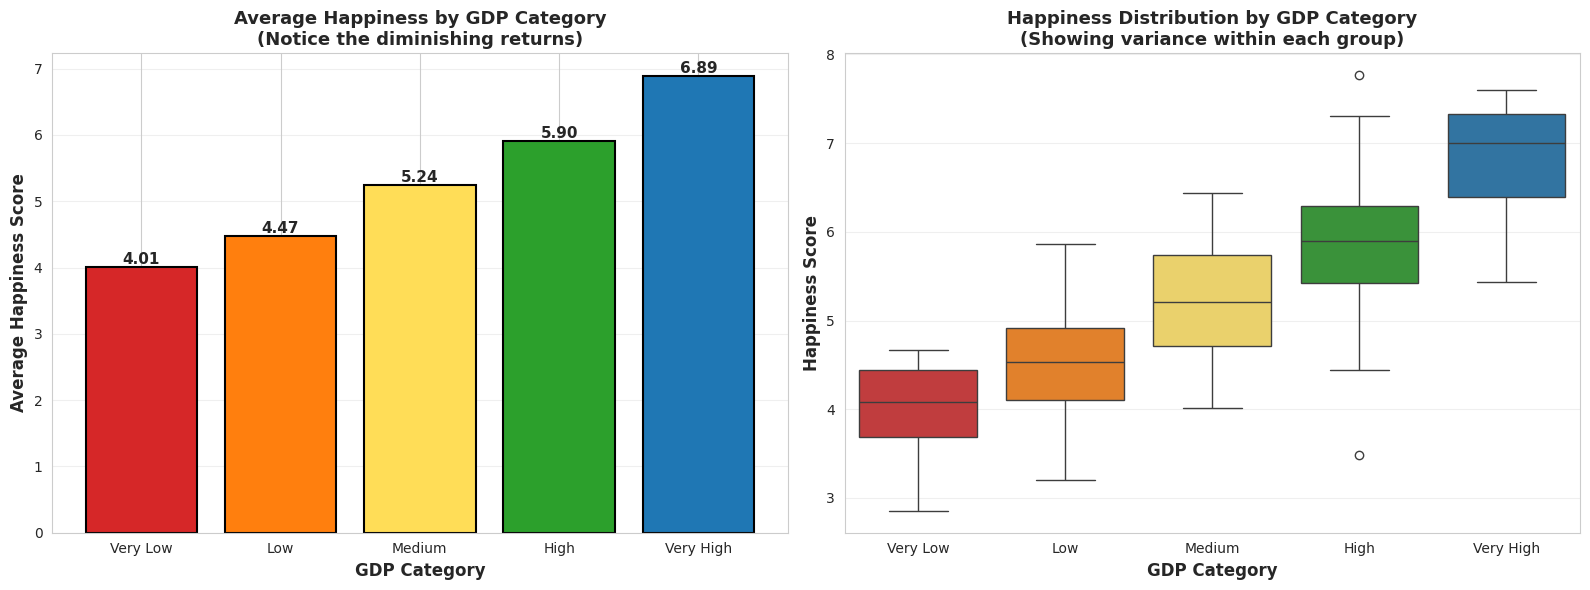


Average Happiness by GDP Category:
  GDP Category  Avg Happiness  Number of Countries
0     Very Low       4.010316                   19
1          Low       4.471520                   25
2       Medium       5.239024                   41
3         High       5.901408                   49
4    Very High       6.888818                   22


In [14]:
# Create GDP bins
df['GDP_bin'] = pd.cut(df['GDP per capita'], bins=5, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])

# Calculate average happiness per GDP bin
gdp_happiness = df.groupby('GDP_bin', observed=True).agg({
    'Score': 'mean',
    'Country or region': 'count'
}).reset_index()
gdp_happiness.columns = ['GDP Category', 'Avg Happiness', 'Number of Countries']

# Create visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Average happiness by GDP category
bars = ax1.bar(gdp_happiness['GDP Category'], gdp_happiness['Avg Happiness'], 
               color=['#d62728', '#ff7f0e', '#ffdd57', '#2ca02c', '#1f77b4'],
               edgecolor='black', linewidth=1.5)
ax1.set_xlabel('GDP Category', fontsize=12, fontweight='bold')
ax1.set_ylabel('Average Happiness Score', fontsize=12, fontweight='bold')
ax1.set_title('Average Happiness by GDP Category\n(Notice the diminishing returns)', 
              fontsize=13, fontweight='bold')
ax1.grid(axis='y', alpha=0.3)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.2f}',
            ha='center', va='bottom', fontsize=11, fontweight='bold')

# Plot 2: Box plot to show distribution
sns.boxplot(data=df, x='GDP_bin', y='Score', 
            palette=['#d62728', '#ff7f0e', '#ffdd57', '#2ca02c', '#1f77b4'],
            ax=ax2)
ax2.set_xlabel('GDP Category', fontsize=12, fontweight='bold')
ax2.set_ylabel('Happiness Score', fontsize=12, fontweight='bold')
ax2.set_title('Happiness Distribution by GDP Category\n(Showing variance within each group)', 
              fontsize=13, fontweight='bold')
ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("\nAverage Happiness by GDP Category:")
print(gdp_happiness)

## 🎨 Visualization 8: Beyond Money - Multiple Factors Interactive Plot

Money matters, but what about other factors? Let's create an interactive bubble chart.

In [15]:
# Interactive bubble chart
fig = px.scatter(
    df,
    x='GDP per capita',
    y='Score',
    size='Healthy life expectancy',
    color='Social support',
    hover_name='Country or region',
    hover_data={
        'GDP per capita': ':.3f',
        'Score': ':.3f',
        'Social support': ':.3f',
        'Freedom to make life choices': ':.3f',
        'Healthy life expectancy': ':.3f'
    },
    color_continuous_scale='Viridis',
    size_max=30,
    title='The Multi-Dimensional Nature of Happiness<br>Size = Life Expectancy | Color = Social Support',
    labels={
        'GDP per capita': 'GDP per Capita',
        'Score': 'Happiness Score',
        'Social support': 'Social Support'
    }
)

fig.update_layout(height=700)
fig.show()

## 🔍 Visualization 9: Factor Importance - Comparing All Factors

Let's visualize which factors have the strongest relationship with happiness.

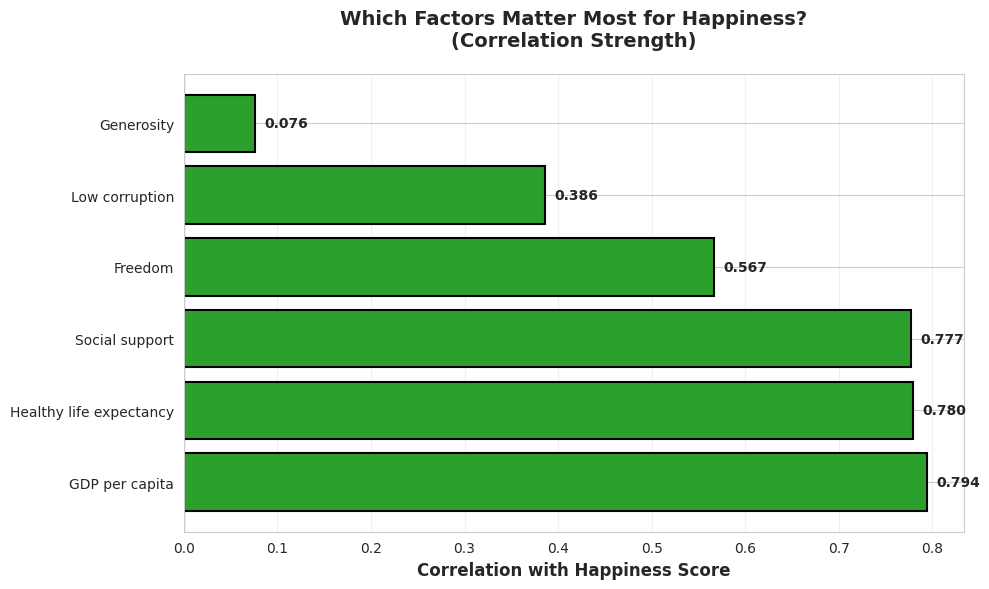


Factor Correlations with Happiness (Ranked):
GDP per capita                          : 0.794
Healthy life expectancy                 : 0.780
Social support                          : 0.777
Freedom to make life choices            : 0.567
Perceptions of corruption               : 0.386
Generosity                              : 0.076


In [16]:
# Calculate correlation of each factor with happiness
correlations = df[factor_cols].corrwith(df['Score']).sort_values(ascending=False)

# Create horizontal bar chart
fig, ax = plt.subplots(figsize=(10, 6))

colors_bars = ['#2ca02c' if x > 0 else '#d62728' for x in correlations]
bars = ax.barh(range(len(correlations)), correlations.values, color=colors_bars, edgecolor='black', linewidth=1.5)

ax.set_yticks(range(len(correlations)))
ax.set_yticklabels([col.replace('Perceptions of', 'Low').replace(' to make life choices', '') 
                     for col in correlations.index])
ax.set_xlabel('Correlation with Happiness Score', fontsize=12, fontweight='bold')
ax.set_title('Which Factors Matter Most for Happiness?\n(Correlation Strength)', 
             fontsize=14, fontweight='bold', pad=20)
ax.axvline(x=0, color='black', linestyle='-', linewidth=0.8)
ax.grid(axis='x', alpha=0.3)

# Add value labels
for i, (bar, val) in enumerate(zip(bars, correlations.values)):
    ax.text(val + 0.01 if val > 0 else val - 0.01, i, f'{val:.3f}', 
            va='center', ha='left' if val > 0 else 'right', fontweight='bold')

plt.tight_layout()
plt.show()

print("\nFactor Correlations with Happiness (Ranked):")
for factor, corr in correlations.items():
    print(f"{factor:40s}: {corr:.3f}")

## 📊 Visualization 10: Pairwise Relationships - Scatter Matrix

Let's see how all factors relate to each other with a scatter matrix.

<Figure size 1400x1400 with 0 Axes>

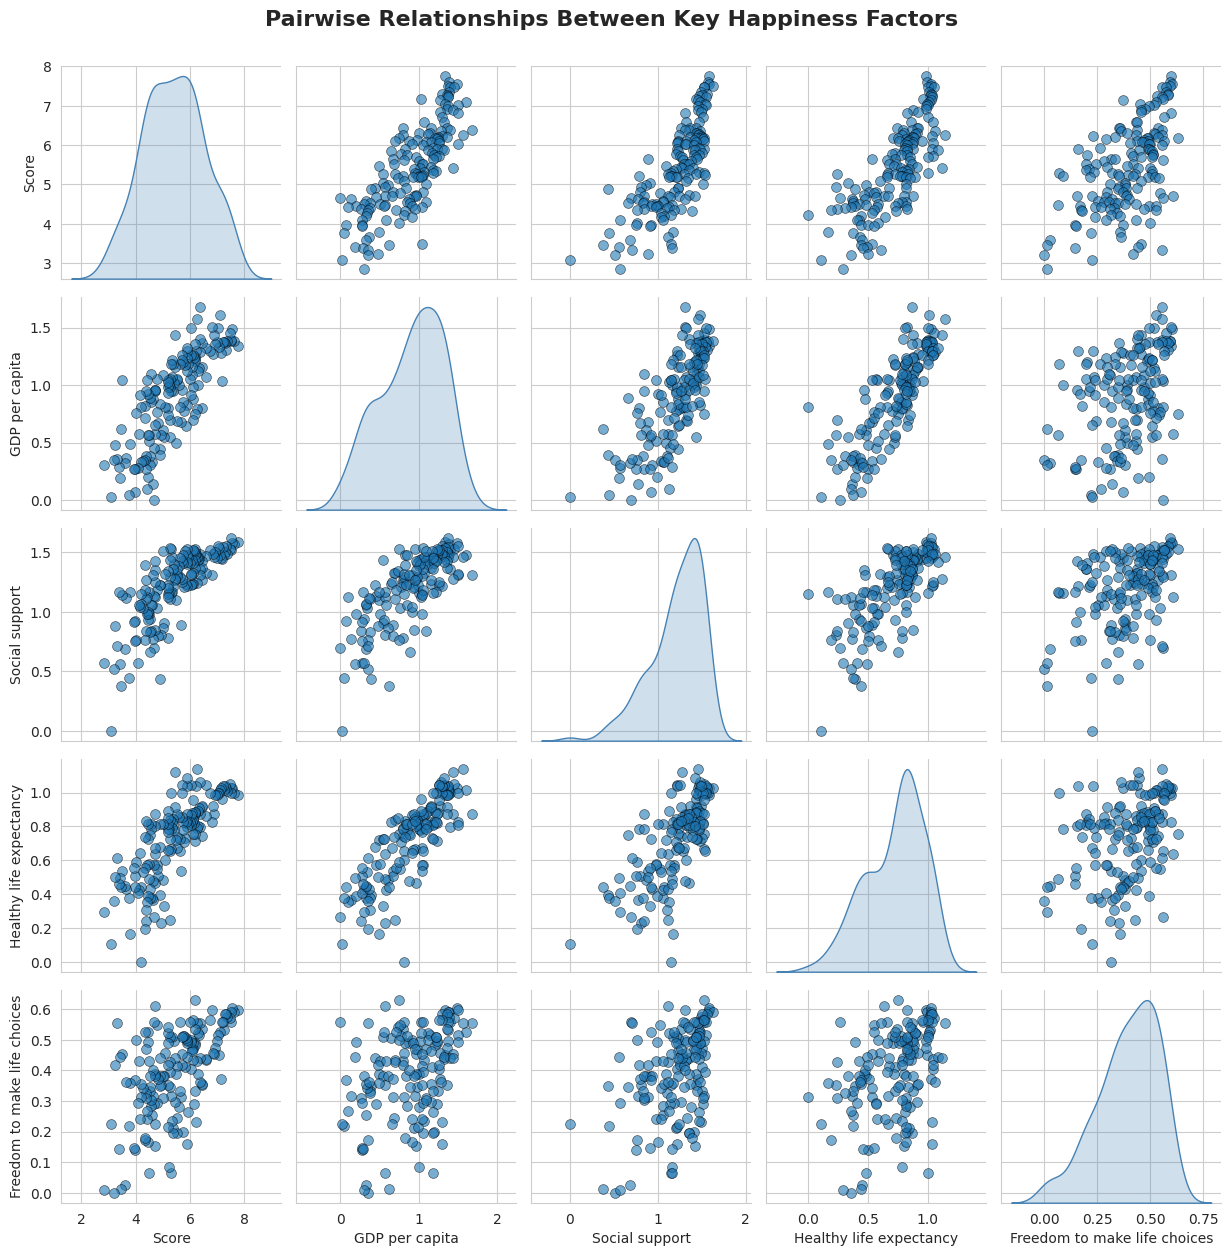

In [17]:
# Create scatter matrix for key factors
key_factors = ['Score', 'GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices']

# Create pairplot
plt.figure(figsize=(14, 14))
pairplot = sns.pairplot(
    df[key_factors], 
    diag_kind='kde',
    plot_kws={'alpha': 0.6, 's': 50, 'edgecolor': 'black', 'linewidth': 0.5},
    diag_kws={'color': 'steelblue'}
)
pairplot.fig.suptitle('Pairwise Relationships Between Key Happiness Factors', 
                       fontsize=16, fontweight='bold', y=1.001)
plt.tight_layout()
plt.show()

## 🎯 Final Analysis: Key Insights & Conclusions

Let's summarize what we've learned about happiness and answer our main question.

In [18]:
# Create a summary visualization
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=('GDP Impact on Happiness', 
                    'Social Support Impact',
                    'Life Expectancy Impact',
                    'Freedom Impact'),
    specs=[[{'type': 'scatter'}, {'type': 'scatter'}],
           [{'type': 'scatter'}, {'type': 'scatter'}]]
)

# GDP scatter
fig.add_trace(
    go.Scatter(x=df['GDP per capita'], y=df['Score'], mode='markers',
               marker=dict(color='blue', size=8, opacity=0.6),
               name='GDP'),
    row=1, col=1
)

# Social Support scatter
fig.add_trace(
    go.Scatter(x=df['Social support'], y=df['Score'], mode='markers',
               marker=dict(color='green', size=8, opacity=0.6),
               name='Social Support'),
    row=1, col=2
)

# Life Expectancy scatter
fig.add_trace(
    go.Scatter(x=df['Healthy life expectancy'], y=df['Score'], mode='markers',
               marker=dict(color='orange', size=8, opacity=0.6),
               name='Life Expectancy'),
    row=2, col=1
)

# Freedom scatter
fig.add_trace(
    go.Scatter(x=df['Freedom to make life choices'], y=df['Score'], mode='markers',
               marker=dict(color='purple', size=8, opacity=0.6),
               name='Freedom'),
    row=2, col=2
)

fig.update_xaxes(title_text="GDP per Capita", row=1, col=1)
fig.update_xaxes(title_text="Social Support", row=1, col=2)
fig.update_xaxes(title_text="Life Expectancy", row=2, col=1)
fig.update_xaxes(title_text="Freedom", row=2, col=2)

fig.update_yaxes(title_text="Happiness", row=1, col=1)
fig.update_yaxes(title_text="Happiness", row=1, col=2)
fig.update_yaxes(title_text="Happiness", row=2, col=1)
fig.update_yaxes(title_text="Happiness", row=2, col=2)

fig.update_layout(
    title_text="The Four Pillars of Happiness: A Comparative View",
    height=800,
    showlegend=False
)

fig.show()

## 💡 Key Findings

### What Makes Countries Happy?

Based on our analysis, here are the key findings:

1. **GDP per Capita (r = ~0.78)**: Strong positive correlation
   - Money DOES matter for happiness, but it's not the only factor
   - Shows diminishing returns - going from very low to low GDP has huge impact, but very high GDP shows smaller gains

2. **Social Support (r = ~0.77)**: Almost as important as GDP
   - Having people to rely on in times of trouble is crucial
   - The happiest countries have strong social safety nets

3. **Healthy Life Expectancy (r = ~0.78)**: Critical for happiness
   - Living longer, healthier lives strongly correlates with happiness
   - Often tied to GDP but represents quality of life

4. **Freedom to Make Life Choices (r = ~0.56)**: Significant impact
   - Personal autonomy and freedom contribute meaningfully to happiness
   - Lower correlation than GDP/social support, but still important

5. **Generosity & Corruption**: Moderate impact
   - These factors show weaker but still positive correlations

---

### 💰 Does Money Really Buy Happiness?

**The Answer: Yes, BUT with important caveats**

✅ **Money does buy happiness** when:
- Moving from poverty to basic economic security (biggest impact)
- Combined with strong social support systems
- Used to improve health and life expectancy
- Enables personal freedom and choices

⚠️ **Money alone is NOT enough** because:
- Diminishing returns beyond moderate wealth
- Social support matters almost as much as GDP
- Countries with similar GDP can have very different happiness scores
- The HOW matters: distribution, social programs, community support

🎯 **The Real Story**: Happiness is **multi-dimensional**. The happiest countries (Nordic countries) combine:
- Adequate wealth (GDP)
- Strong social safety nets
- Healthy populations
- Personal freedoms
- Low corruption
- Generous, trusting societies

**Conclusion**: Money provides the foundation, but social factors build the house of happiness!